<h1 style='text-align:center;color:green;font-weight:bold'>Exploratory Sales Data Analysis (EDA)</h1>

### Import Important Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loadinging And Overview Of Data 

In [4]:
df = pd.read_excel(r'C:\Users\Administrator\Downloads\BlinkIT Grocery Data.xlsx')

In [5]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#stastical overview of data
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


### Cleaning Data

In [9]:
#checking null value if any
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [10]:
#hundling null value and fill with average weight
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())

In [11]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [12]:
#checking dublicated value
df.duplicated().sum()

0

### Feature Engineering

In [13]:
#categorized products based on sales performance
def Sales_performance(x):
    if 50 <= x < 100:
        return 'middle performance'
    if x >= 100:
        return 'high performance'
    else:
        return 'low performance'

df['Sales_performance'] = df['Sales'].apply(Sales_performance)
df['Sales_performance'].unique()

array(['high performance', 'middle performance', 'low performance'],
      dtype=object)

### Sales Trends Based on Outlet Establishment Year

In [14]:
result = df.groupby('Outlet Establishment Year')['Sales'].agg(lambda x: round(x.sum(), 2)).reset_index()
result.columns = ['Outlet Establishment Year', 'Total Sales']
result.sort_values(by='Total Sales',ascending=False)

,Outlet Establishment Year,Total Sales
6,2018,204522.26
5,2017,133103.91
4,2016,132113.37
2,2014,131809.02
8,2022,131477.78
3,2015,130942.78
1,2012,130476.86
7,2020,129103.96
0,2011,78131.57


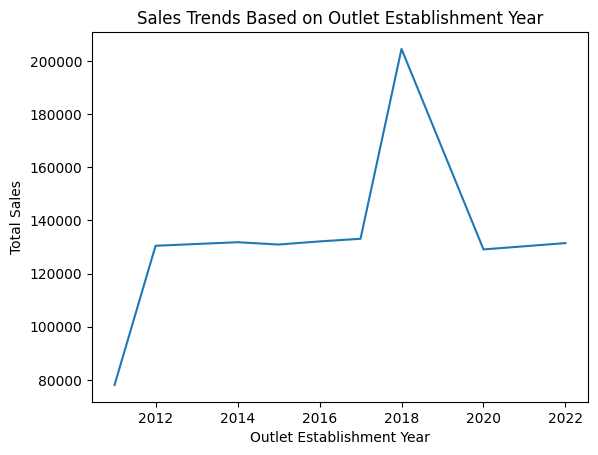

In [44]:
# Plotting the bar chart
ax = result.plot(kind='line', x='Outlet Establishment Year', y='Total Sales', legend=False)

# Adding title and labels
plt.title('Sales Trends Based on Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')

plt.show()


### Relationship Between Item Weight and Sales

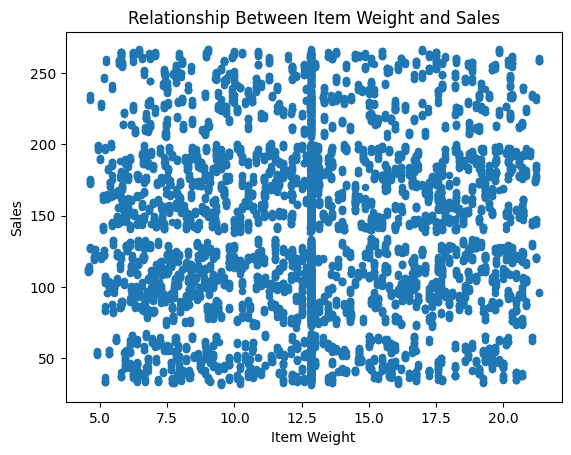

In [46]:
df.plot(kind='scatter', x='Item Weight', y='Sales',title='Relationship Between Item Weight and Sales')
plt.show()

### Item Fat Content Distribution

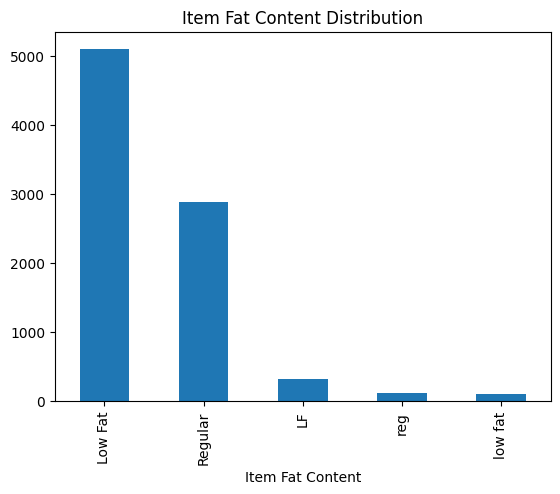

In [48]:
item_fat_content = df['Item Fat Content'].value_counts().reset_index()
total_items =item_fat_content['count'].sum()
item_fat_content['item_fat_content%'] = item_fat_content['count']/total_items*100
item_fat_content[['Item Fat Content','count']].plot(kind='bar',x='Item Fat Content',y='count',title='Item Fat Content Distribution',legend=False)
plt.show()

### Item Fat Content By Sales

In [18]:
result_item_fat_content = df.groupby('Item Fat Content')['Sales'].sum().reset_index()
result_item_fat_content.columns = ['Item Fat Content','Total Sales']
result_item_fat_content

,Item Fat Content,Total Sales
0,LF,43857.1082
1,Low Fat,717390.8474
2,Regular,409413.1234
3,low fat,15071.7328
4,reg,15948.6810


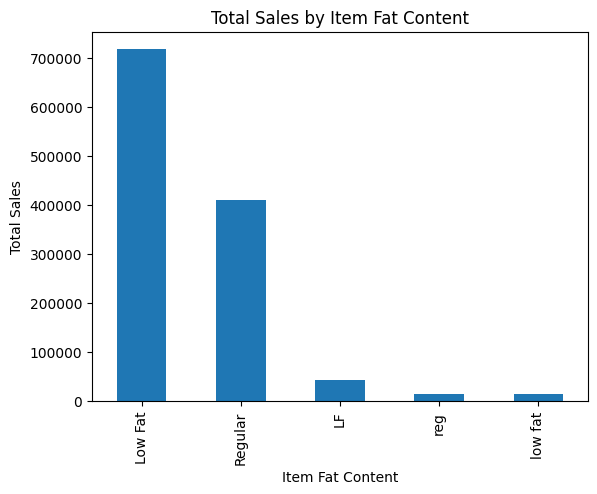

In [19]:
result_item_fat_content.sort_values(by='Total Sales',ascending=False).plot(kind='bar', x='Item Fat Content', y='Total Sales', legend=False)

# Adding title and labels
plt.title('Total Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')

plt.show()

### Total Sales By Item Type

In [20]:
result_item_type = df.groupby('Item Type')['Sales'].agg(lambda x: round(x.sum(),2)).reset_index()
result_item_type.columns = ['Item Type','Total Sales']
result_item_type.sort_values(by='Total Sales',ascending=False)

,Item Type,Total Sales
6,Fruits and Vegetables,178124.08
13,Snack Foods,175433.92
9,Household,135976.53
5,Frozen Foods,118558.88
4,Dairy,101276.46
3,Canned,90706.73
0,Baking Goods,81894.74
8,Health and Hygiene,68025.84
10,Meat,59449.86
14,Soft Drinks,58514.17


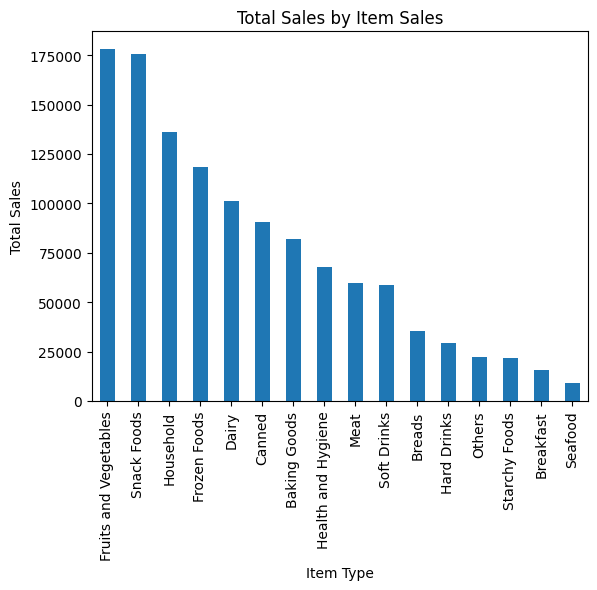

In [21]:
# Plotting the bar chart
ax = result_item_type.sort_values(by='Total Sales',ascending=False).plot(kind='bar', x='Item Type', y='Total Sales', legend=False)

# Adding title and labels
plt.title('Total Sales by Item Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

plt.show()

### Product Rating Distribution

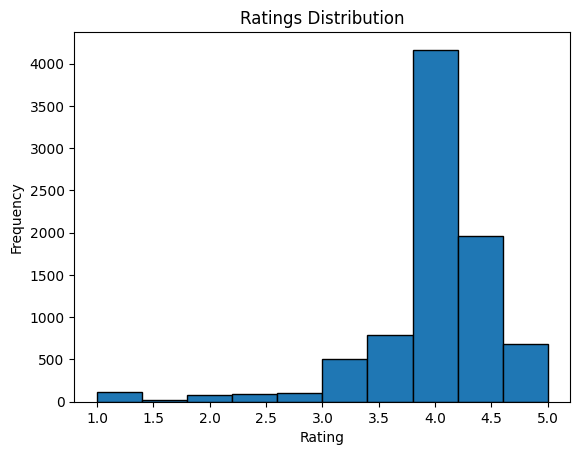

In [52]:
# Plotting a histogram of the 'Rating' column
df['Rating'].plot(kind='hist', bins=10, edgecolor='black')

# Adding labels and title
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Product Weight Distribution

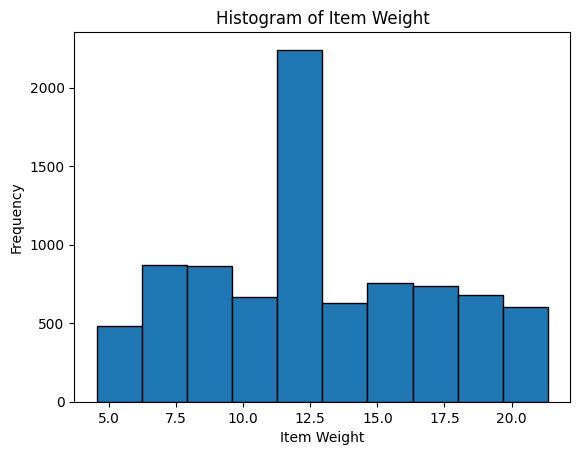

In [24]:
# Plotting a histogram of the 'Item Weight' column
df['Item Weight'].plot(kind='hist', bins=10, edgecolor='black')

# Adding labels and title
plt.title('Histogram of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Average Product Value

In [53]:
df['Sales'].sum()/df['Item Identifier'].count()

140.99278338613163

### Total Products

In [26]:
df['Item Identifier'].count()

8523

### Total Sales

In [27]:
df['Sales'].sum()

1201681.4928

### Total Sales by Outlet Location Type

In [28]:
df.groupby('Outlet Location Type')['Sales'].sum()

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6476
Tier 3    472133.0332
Name: Sales, dtype: float64

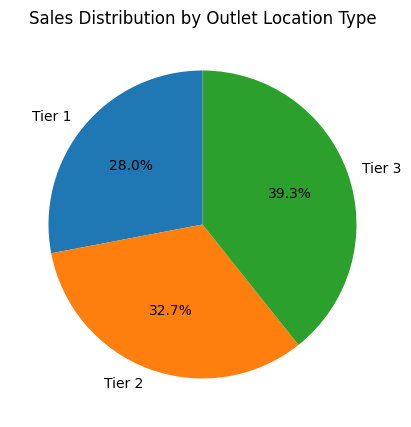

In [29]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
sales_by_location.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Outlet Location Type')
plt.ylabel('')  # Hides the y-label to make it cleaner
plt.show()

### Avearge Outlet Location Type Value For Each Location

In [30]:
total_sales = df['Sales'].sum()
total_Outlet_Location_Type = df['Outlet Location Type'].nunique()
total_sales/total_Outlet_Location_Type

400560.49759999994

### Count of Outlet Location Type

In [31]:
df['Outlet Location Type'].value_counts()

Outlet Location Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

### Total Sales By Outlet Size	

In [32]:
df.groupby('Outlet Size')['Sales'].sum()

Outlet Size
High      248991.5860
Medium    507895.7364
Small     444794.1704
Name: Sales, dtype: float64

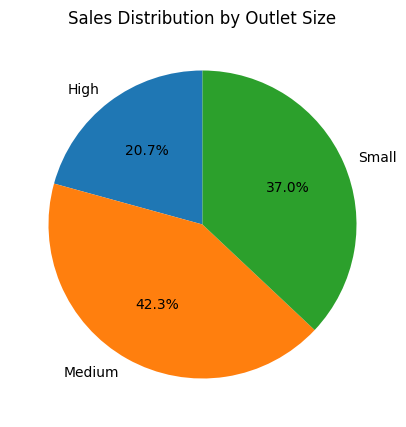

In [33]:
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
sales_by_outlet_size.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Outlet Size')
plt.ylabel('')  # Hides the y-label to make it cleaner
plt.show()

### Total Sales By Outlet Type

In [34]:
df['Outlet Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [35]:
df.groupby('Outlet Type')['Sales'].sum()

Outlet Type
Grocery Store        151939.1490
Supermarket Type1    787549.8928
Supermarket Type2    131477.7764
Supermarket Type3    130714.6746
Name: Sales, dtype: float64

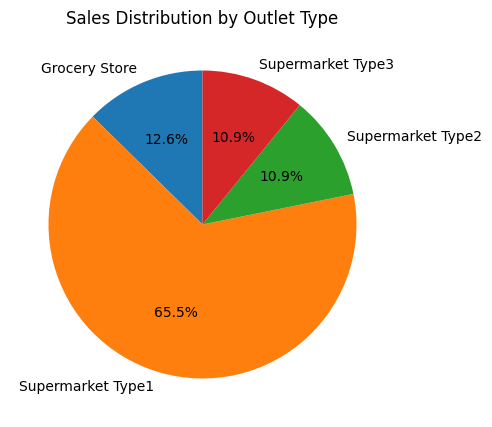

In [36]:
sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].sum()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
sales_by_outlet_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Outlet Type')
plt.ylabel('')  # Hides the y-label to make it cleaner
plt.show()

### Item Visibility Distribution

Text(0, 0.5, 'Frequency')

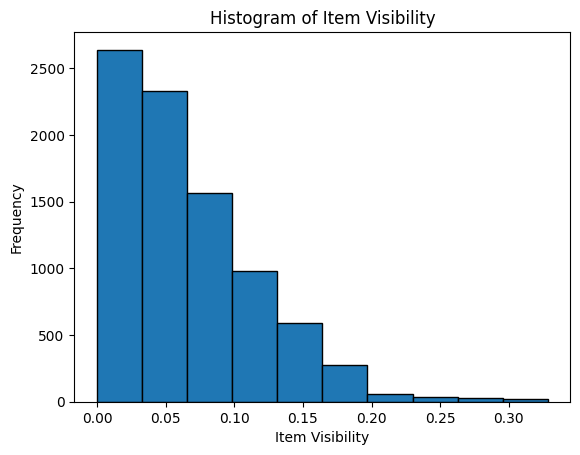

In [38]:
df['Item Visibility'].plot(kind='hist',bins=10,edgecolor='black')
plt.title('Histogram of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')

### Item Visibility Relationship with Sales

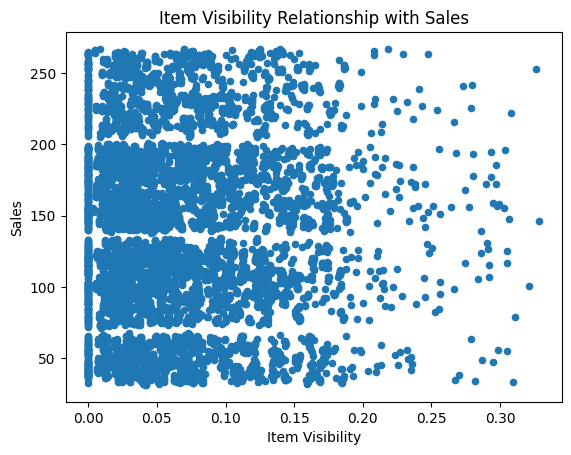

In [54]:
df.plot(kind='scatter',x='Item Visibility',y='Sales')
plt.title('Item Visibility Relationship with Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()

[]

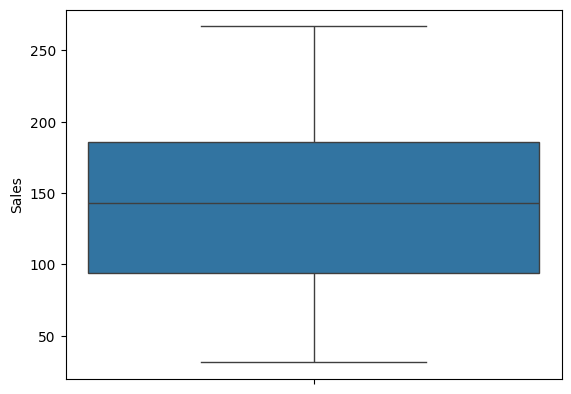

In [55]:
#checking outliers sales
sns.boxplot(data=df,y='Sales')
plt.plot()

### Sales Performance Distribution

In [42]:
sales_performance = df['Sales_performance'].value_counts().reset_index()
sales_performance.columns = ['Sales_Performance', 'Count']
sales_performance

,Sales_Performance,Count
0,high performance,6084
1,middle performance,1682
2,low performance,757


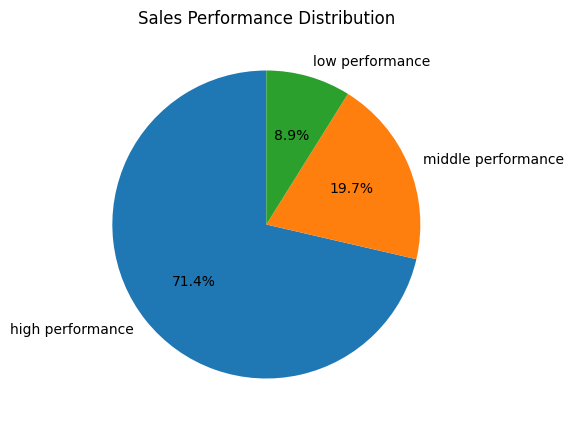

In [43]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sales_performance['Count'], labels=sales_performance['Sales_Performance'], autopct='%1.1f%%', startangle=90)

# Adding title
plt.title('Sales Performance Distribution')
plt.show()


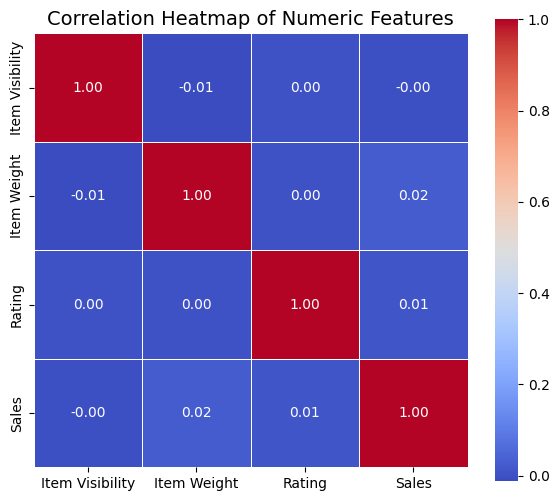

In [68]:
df1 = df[['Item Visibility','Item Weight','Rating','Sales']]
plt.figure(figsize=(7,6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.show()